In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j


custom jupyter library imported


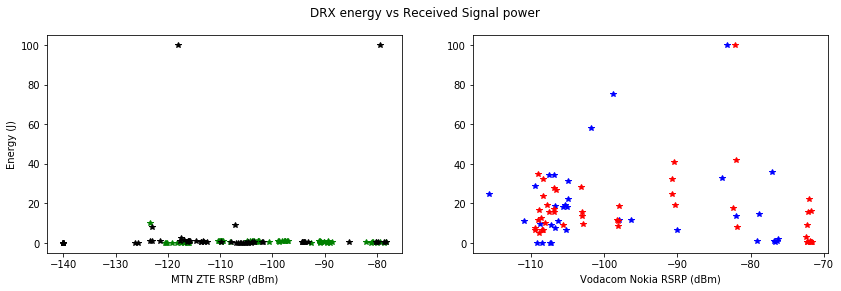

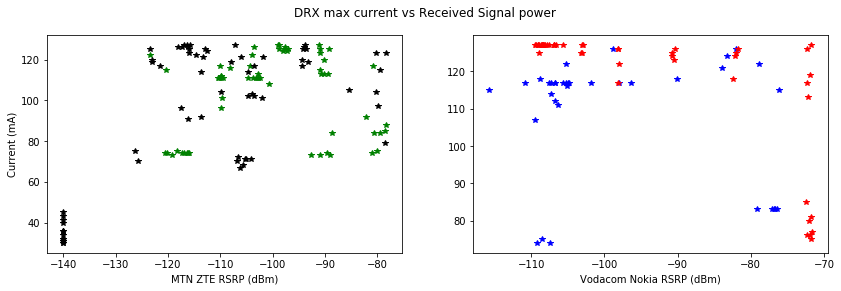

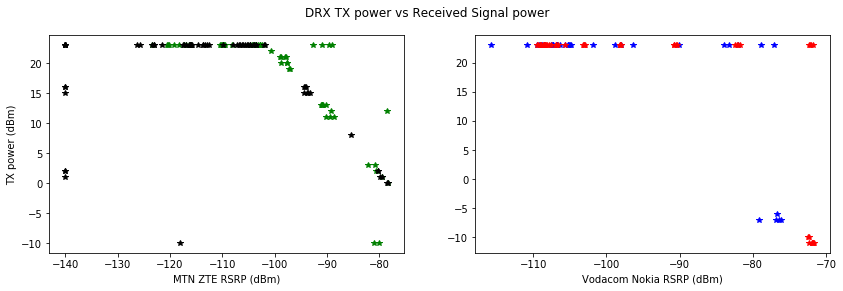

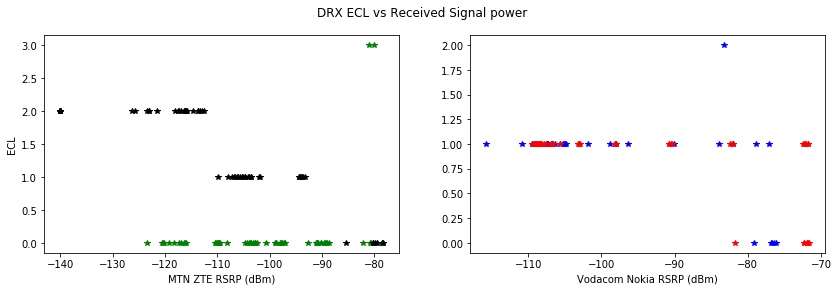

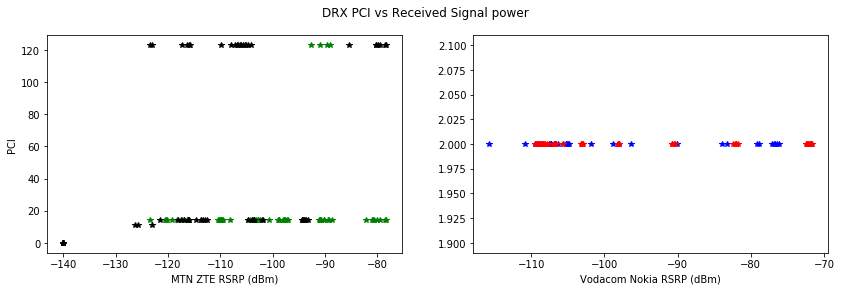

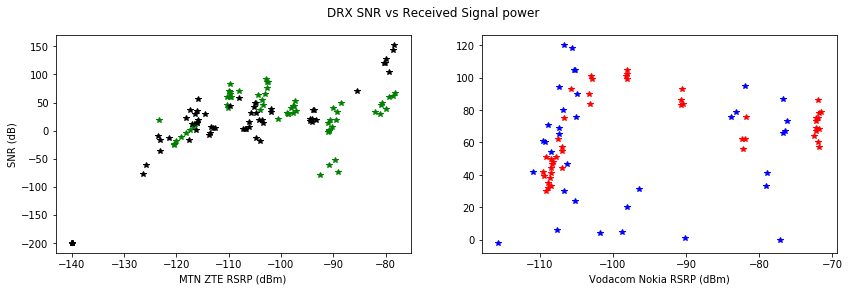

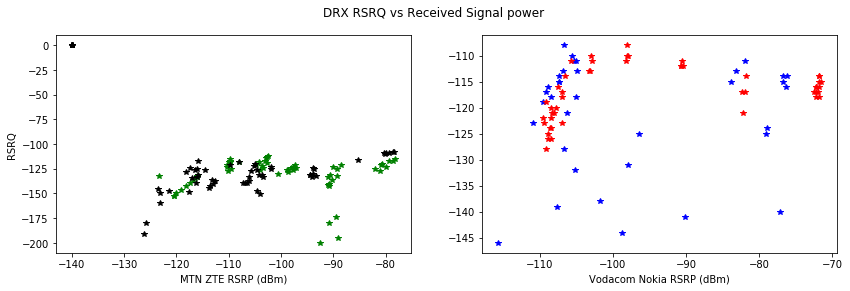

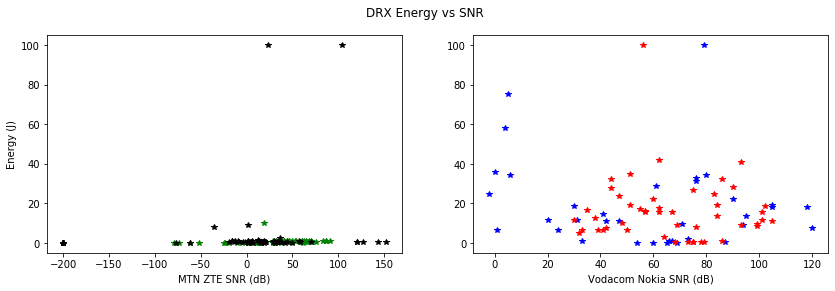

In [2]:
def plot(x, y, xr, yr, files, colour):
    for f in files:
        zu_mg = j.merge(j.mk(f))
        if zu_mg:
            plt.plot(np.array(zu_mg[x])/xr, np.array(zu_mg[y])/yr, colour)
            
def compare_ue(text, ylabel, xlabel, ky, kx, ry, rx):
    fx = 14
    fy = 4
    sx = 1
    sy = 2
    j.debug = False
    plt.figure(figsize=(fx, fy))
    plt.suptitle(text)

    plt.subplot(sx, sy, 1)
    plt.xlabel('Ublox ' + xlabel)
    plt.ylabel(ylabel)
    j.dirr = 'logs/zte_mtn/rf_shield/ublox/'
    plot(kx, ky, rx, ry, files, 'g*')
    j.dirr = 'logs/nokia_vodacom/centurycity/ublox/'
    plot(kx, ky, rx, ry, files, 'b*')

    plt.subplot(sx, sy, 2)
    plt.xlabel('Quectel ' + xlabel)
    j.dirr = 'logs/zte_mtn/rf_shield/quectel/'
    plot(kx, ky, rx, ry, files, 'k*')
    j.dirr = 'logs/nokia_vodacom/centurycity/quectel/'
    plot(kx, ky, rx, ry, files, 'r*')

    plt.savefig('img/vodacom_vs_mtn_ue' + "_".join(text.split()) + '.png')
    plt.show()
    
def compare_nw(text, ylabel, xlabel, ky, kx, ry, rx):
    fx = 14
    fy = 4
    sx = 1
    sy = 2
    j.debug = False
    plt.figure(figsize=(fx, fy))
    plt.suptitle(text)

    plt.subplot(sx, sy, 1)
    plt.xlabel('MTN ZTE ' + xlabel)
    plt.ylabel(ylabel)
    j.dirr = 'logs/zte_mtn/rf_shield/ublox/'
    plot(kx, ky, rx, ry, files, 'g*')
    j.dirr = 'logs/zte_mtn/rf_shield/quectel/'
    plot(kx, ky, rx, ry, files, 'k*')

    plt.subplot(sx, sy, 2)
    plt.xlabel('Vodacom Nokia ' + xlabel)
    
    j.dirr = 'logs/nokia_vodacom/centurycity/ublox/'
    plot(kx, ky, rx, ry, files, 'b*')
    j.dirr = 'logs/nokia_vodacom/centurycity/quectel/'
    plot(kx, ky, rx, ry, files, 'r*')
    plt.savefig('img/vodacom_vs_mtn_nw' + "_".join(text.split()) + '.png')
    plt.show()
    
def compare(text, ylabel, xlabel, ky, kx, ry, rx):
    # compare_ue(text, ylabel, xlabel, ky, kx, ry, rx)
    compare_nw(text, ylabel, xlabel, ky, kx, ry, rx)
    
# files = ['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*']
# files = ['release/releaseset/*', 'drx/set/*', 'echo/set/*', 'ptau/set/*']
files = ['ptau/capture/*']
compare('DRX energy vs Received Signal power', 'Energy (J)', 'RSRP (dBm)', 'energy', 'Signal power', 1000, 10)
compare('DRX max current vs Received Signal power', 'Current (mA)', 'RSRP (dBm)', 'maxCurrent', 'Signal power', 1, 10)
compare('DRX TX power vs Received Signal power', 'TX power (dBm)', 'RSRP (dBm)', 'TX power', 'Signal power', 10, 10)
compare('DRX ECL vs Received Signal power', 'ECL', 'RSRP (dBm)', 'ECL', 'Signal power', 1, 10)
compare('DRX PCI vs Received Signal power', 'PCI', 'RSRP (dBm)', 'PCI', 'Signal power', 1, 10)
compare('DRX SNR vs Received Signal power', 'SNR (dB)', 'RSRP (dBm)', 'SNR', 'Signal power', 1, 10)
compare('DRX RSRQ vs Received Signal power', 'RSRQ', 'RSRP (dBm)', 'RSRQ', 'Signal power', 1, 10)
compare('DRX Energy vs SNR', 'Energy (J)', 'SNR (dB)', 'energy', 'SNR', 1000, 1)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib
import pandas as pd
import seaborn as sns
importlib.reload(j)

import matplotlib.ticker as ticker
import glob

import plotter as p
importlib.reload(p)

dirrs = ['logs/zte_mtn/rf_shield/ublox/', 'logs/nokia_vodacom/centurycity/ublox/', 'logs/zte_mtn/rf_shield/quectel/', 'logs/nokia_vodacom/centurycity/quectel/']

custom jupyter @DanielRobinson


['ptau/capture/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
logs/zte_mtn/rf_shield/quectel/
logs/nokia_vodacom/centurycity/quectel/
len(data) [63, 35, 54, 48] [1.    1.8   1.167 1.312]


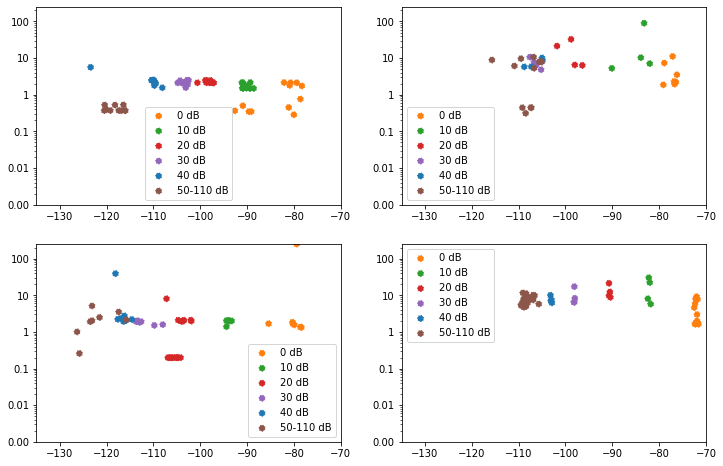

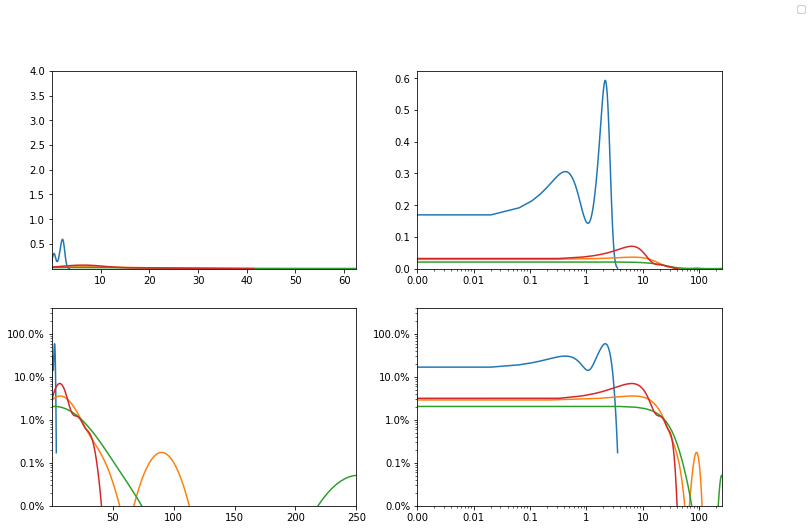

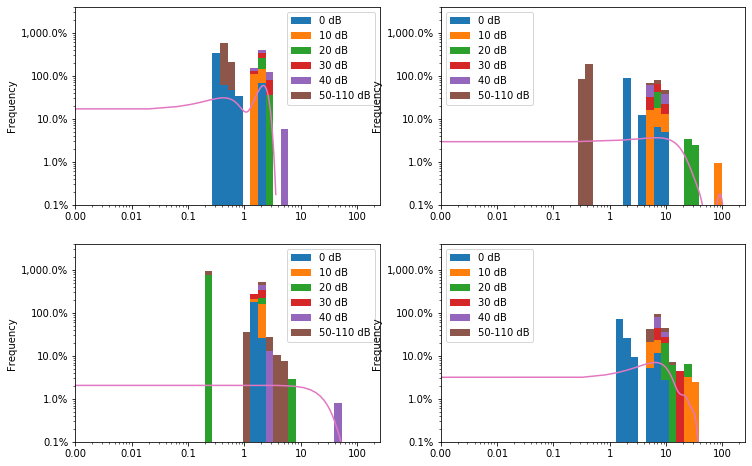

In [4]:
importlib.reload(p)

files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
# files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

ky = 'txTime'
kx = 'Signal power'

limited = True
# limited = False

thresh = plotlim = distlim = histlim = [None] * 4

thresh = [-2000, None, None, None]
scale = [10, 1000]

x = 0.001
y = 250

percx = 0.0001
percy = 4

if limited:
    plotlim = [-135,  -70, x, y]
    distlim = [x, y, percx, percy]
    histlim = [x, y, percx*10, percy*10]
    
p.pan4('ptau_' + ky, dirrs, files, kx, ky, thresh, plotlim, distlim, histlim, scale, limited, bins=40)

['ptau/capture/*']
logs/zte_mtn/rf_shield/ublox/
logs/nokia_vodacom/centurycity/ublox/
logs/zte_mtn/rf_shield/quectel/
logs/nokia_vodacom/centurycity/quectel/
len(data) [63, 35, 54, 48] [1.    1.8   1.167 1.312]


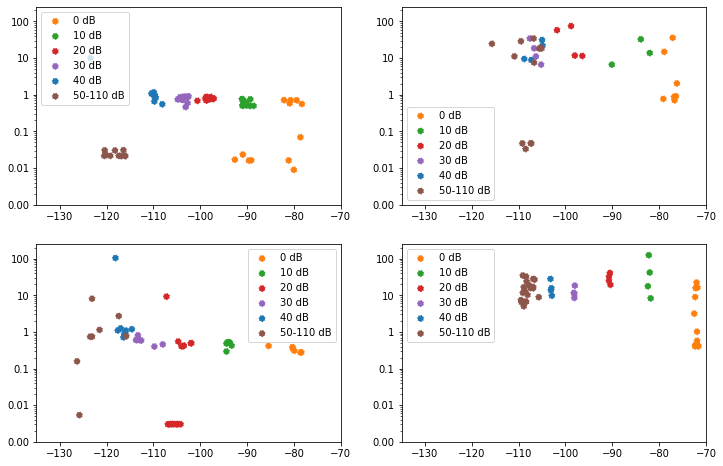

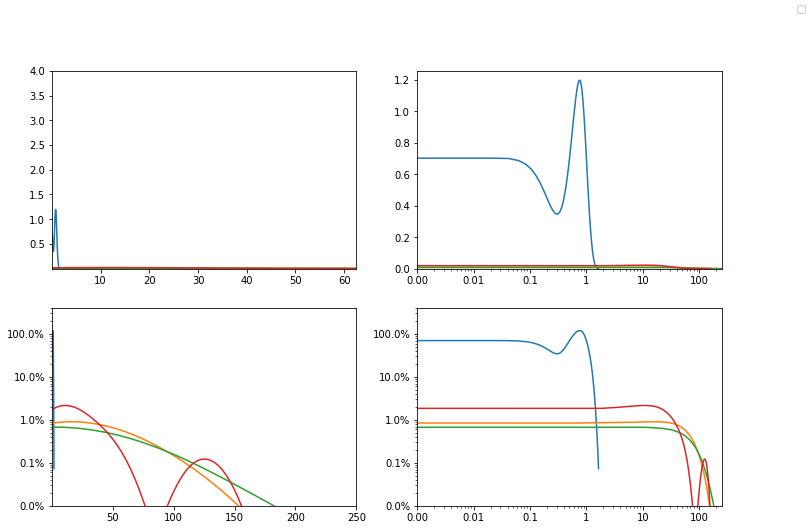

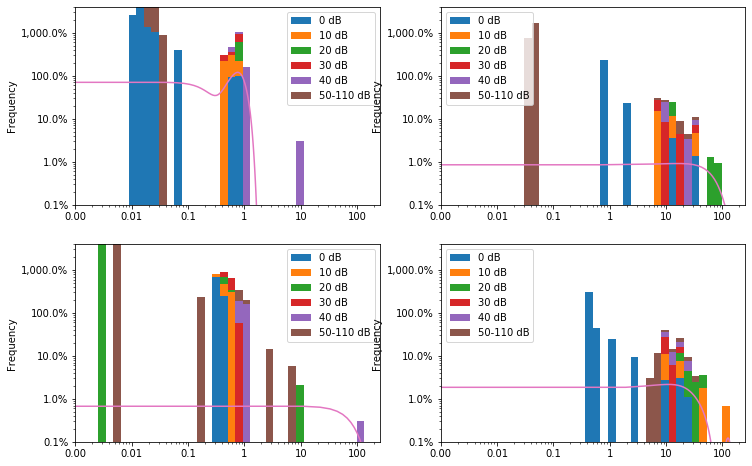

In [6]:
importlib.reload(p)

files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
# files.append(['drx/cap/*'])
files.append(['ptau/capture/*'])
files = sum(files, [])
print(files)

ky = 'energy'
kx = 'Signal power'

limited = True
# limited = False

thresh = plotlim = distlim = histlim = [None] * 4

thresh = [-2000, None, None, None]
scale = [10, 1000]

x = 0.001
y = 250

percx = 0.0001
percy = 4

if limited:
    plotlim = [-135,  -70, x, y]
    distlim = [x, y, percx, percy]
    histlim = [x, y, percx*10, percy*10]
    
p.pan4('ptau_' + ky, dirrs, files, kx, ky, thresh, plotlim, distlim, histlim, scale, limited, bins=40)